## Observations and Insights 
- Based on the summary statistics table and the boxplot for the final tumor volumen based on drug regimen, it looks like the most promising treatments are: Capomulin & Ramicane. Both show the lowest tumor volumes in the last time point. Additionally both treatments have the largest sample of data based on the total number of measurements per drug regimen.
- Based on the random selection of mice subjected to the Capomulin treatment, the samples show a decrease in the tumor volume over time. 
- There's a strong positive correlation between the weight of the mice vs the average volume of the tumor. 
- Additionally, it would be interesting to compare the change in tumor volumen based on the drug regimen and the same final timepoint to confirm the effectiveness of the selected treatments.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])].reset_index()
duplicate_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,909,g989,Propriva,Female,21,26,0,45.000000,0
1,911,g989,Propriva,Female,21,26,5,47.570392,0
2,913,g989,Propriva,Female,21,26,10,49.880528,0
3,915,g989,Propriva,Female,21,26,15,53.442020,0
4,917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merge_df.loc[(merge_df["Mouse ID"]== "g989")].reset_index()
duplicate_mouse

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,908,g989,Propriva,Female,21,26,0,45.000000,0
1,909,g989,Propriva,Female,21,26,0,45.000000,0
2,910,g989,Propriva,Female,21,26,5,48.786801,0
3,911,g989,Propriva,Female,21,26,5,47.570392,0
4,912,g989,Propriva,Female,21,26,10,51.745156,0
5,913,g989,Propriva,Female,21,26,10,49.880528,0
6,914,g989,Propriva,Female,21,26,15,51.325852,1
7,915,g989,Propriva,Female,21,26,15,53.442020,0
8,916,g989,Propriva,Female,21,26,20,55.326122,1
9,917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.loc[(merge_df['Mouse ID'] != "g989")].reset_index()
clean_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1875,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1876,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1877,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1878,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summary_df = pd.merge(summary_df, clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(), on="Drug Regimen")
summary_df =pd.merge(summary_df, clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(), on="Drug Regimen")
summary_df =pd.merge(summary_df, clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(), on="Drug Regimen")
summary_df =pd.merge(summary_df, clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(), on="Drug Regimen")
summary_df.columns = ['Mean: Tumor Vol', 'Median: Tumor Vol', 'Variance: Tumor Vol', 'Standard Deviation: Tumor Vol', 'SEM: Tumor Vol']
summary_df

,Mean: Tumor Vol,Median: Tumor Vol,Variance: Tumor Vol,Standard Deviation: Tumor Vol,SEM: Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df2 = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median','var','std', 'sem']})
summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

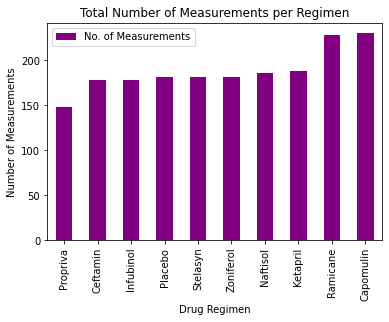

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_df = clean_df.groupby("Drug Regimen").agg({"Drug Regimen": "count"}).rename(columns={"Drug Regimen": "No. of Measurements"})
bar_df.sort_values("No. of Measurements", inplace= True)
bar_df.plot(kind="bar", facecolor="purple")
plt.title("Total Number of Measurements per Regimen")
plt.ylabel("Number of Measurements")
plt.show()

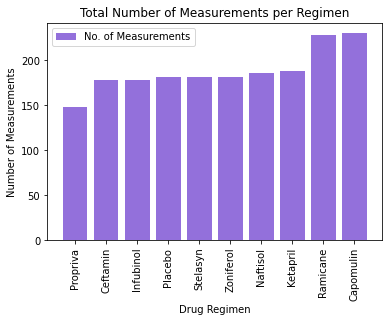

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#bar_df.index
plt.bar(bar_df.index, bar_df["No. of Measurements"], color = "mediumpurple", label ="No. of Measurements")
plt.xticks(rotation = 90) 
plt.title("Total Number of Measurements per Regimen")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")
plt.legend(loc="upper left")
plt.show()

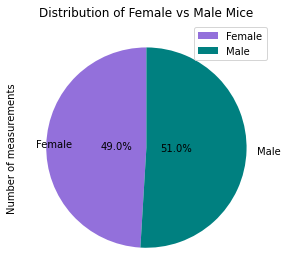

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
my_colors = ["mediumpurple", "teal"]
pie_df = clean_df.groupby("Sex").agg({"Sex": "count"}).rename(columns={"Sex": "Count"})
pie_df.plot(kind="pie", y="Count", title="Distribution of Female vs Male Mice", startangle=90, pctdistance  = .3,colors=my_colors, autopct="%1.1f%%", center= (2,0))
plt.ylabel("Number of measurements")
plt.tight_layout()
plt.show()

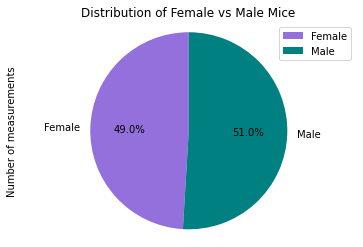

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_df["Count"], labels=pie_df.index, colors=my_colors, autopct="%1.1f%%", startangle =90)
plt.axis("equal")
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Number of measurements")
plt.legend(loc="upper right")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_df = clean_df.groupby("Mouse ID").agg({"Timepoint": "max"})
final_tumor_df = final_tumor_df.merge(clean_df, on=["Mouse ID","Timepoint"])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_df 

,Mouse ID,Timepoint,index,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,463,Infubinol,Female,20,23,67.973419,2
1,a251,45,473,Infubinol,Female,21,25,65.525743,1
2,a262,45,483,Placebo,Female,17,29,70.717621,4
3,a275,45,493,Ceftamin,Female,20,28,62.999356,3
4,a366,30,500,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...,...
243,z435,10,1862,Propriva,Female,12,26,48.710661,0
244,z578,45,84,Ramicane,Male,11,16,30.638696,0
245,z581,45,1872,Infubinol,Female,24,25,62.754451,3
246,z795,45,1882,Naftisol,Female,13,29,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)

top4_df = final_tumor_df[(final_tumor_df["Drug Regimen"] == "Capomulin")|(final_tumor_df["Drug Regimen"] == "Ramicane")|(final_tumor_df["Drug Regimen"] == "Infubinol")|(final_tumor_df["Drug Regimen"] == "Ceftamin")]


q1 =[]
q2 =[]
q3 =[]
iqr = []
lower_bound = []
upper_bound =[]
max_val = []
min_val = []

for each in treatments:
    q1_val = top4_df.loc[final_tumor_df["Drug Regimen"] == each,"Tumor Volume (mm3)"].quantile(.25)
    q2_val = top4_df.loc[final_tumor_df["Drug Regimen"] == each,"Tumor Volume (mm3)"].quantile(.50)
    q3_val = top4_df.loc[final_tumor_df["Drug Regimen"] == each,"Tumor Volume (mm3)"].quantile(.75)
    q1.append(q1_val)
    q2.append(q2_val)
    q3.append(q3_val)
    iqr_val = q3_val-q1_val
    iqr.append(iqr_val)
    lower_bound.append(q1_val - (1.5*iqr_val))
    upper_bound.append(q3_val + (1.5*iqr_val))

outliers_df = pd.DataFrame({"Drug Regimen": treatments})
outliers_df["Q1"] = q1
outliers_df["Q2"] = q2
outliers_df["Q3"] = q3
outliers_df["IQR"] = iqr
outliers_df["Lower Bound"] = lower_bound
outliers_df["Upper Bound"] = upper_bound
outliers_df


,Drug Regimen,Q1,Q2,Q3,IQR,Lower Bound,Upper Bound
0,Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015
1,Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811
2,Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446
3,Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458


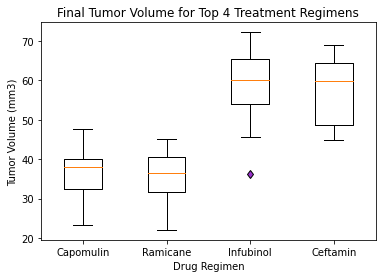

In [17]:
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
capomulin = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == "Capomulin","Tumor Volume (mm3)"].values
ramicane = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == "Ramicane","Tumor Volume (mm3)"].values
infubinol = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == "Infubinol","Tumor Volume (mm3)"].values
ceftamin = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == "Ceftamin","Tumor Volume (mm3)"].values

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outliers_format = dict(markerfacecolor='darkorchid', marker = 'd')

plt.boxplot([capomulin, ramicane, infubinol, ceftamin], labels = treatments, flierprops=outliers_format)
plt.title("Final Tumor Volume for Top 4 Treatment Regimens")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

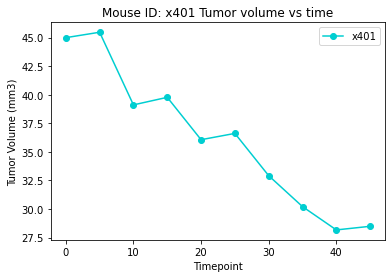

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mice = top4_df.loc[top4_df["Drug Regimen"] == "Capomulin","Mouse ID"].values
mouse_id = mice[np.random.randint(0,len(mice)-1)]
mouse_id

mouse_df = clean_df[clean_df["Mouse ID"] == mouse_id]
x_axis = mouse_df["Timepoint"].values
y_axis = mouse_df["Tumor Volume (mm3)"].values
plt.plot(x_axis, y_axis, marker ='o', color='darkturquoise', label=mouse_id)
plt.legend(loc="upper right")
plt.title(f"Mouse ID: {mouse_id} Tumor volume vs time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

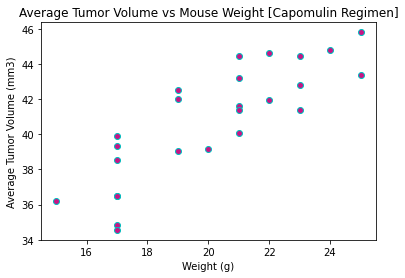

In [19]:
# Generate a scatter plot of  mouse weight vs average tumor volume for the Capomulin regimen
scatter_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
scatter_df = scatter_df.groupby('Mouse ID')\
            .agg({'Weight (g)':'mean', 'Tumor Volume (mm3)':'mean'})
x_values = scatter_df["Weight (g)"]
y_values = scatter_df["Tumor Volume (mm3)"]
plt.scatter(x_values, y_values , marker="o", facecolors="mediumvioletred", edgecolors="c")
plt.title("Average Tumor Volume vs Mouse Weight [Capomulin Regimen]")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between Weight & Average Tumor Volume is 0.84


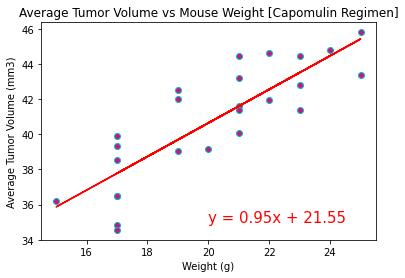

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(scatter_df["Weight (g)"], scatter_df["Tumor Volume (mm3)"])
print(f"The correlation between Weight & Average Tumor Volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="mediumvioletred", edgecolors="c")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.title("Average Tumor Volume vs Mouse Weight [Capomulin Regimen]")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()